In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle #creating a hidden directory 
! cp kaggle.json ~/.kaggle/ #pasting the kaggle api token to above dir
! chmod 600 ~/.kaggle/kaggle.json ## chaging the mode for the file

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! kaggle datasets download msambare/fer2013 # downloading the datset

 68% 41.0M/60.3M [00:00<00:00, 95.7MB/s]
100% 60.3M/60.3M [00:00<00:00, 113MB/s] 


In [ ]:
! unzip /content/fer2013.zip #unzip the downloaded dataset

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
#importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

#importing deep learning libraries
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

Displaying Images

In [ ]:

picture_size = 48
folder_path = "/content/fer2013.zip"



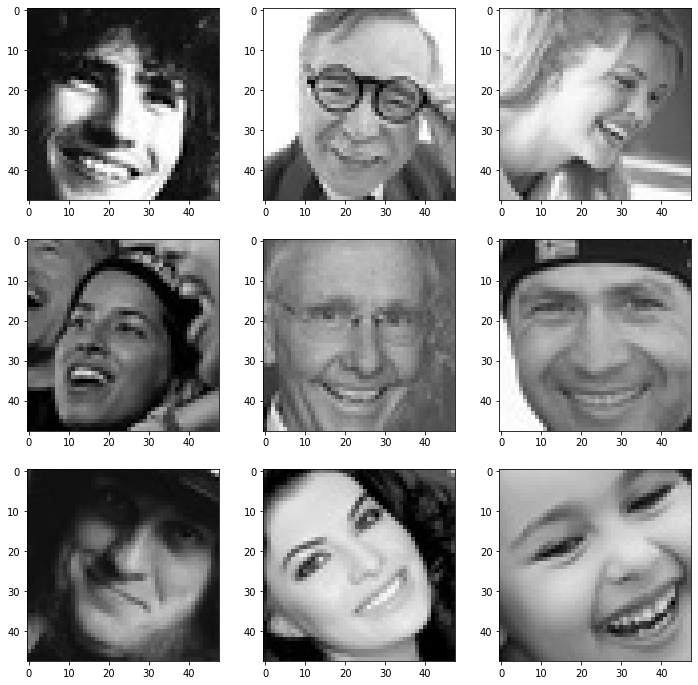

In [ ]:

expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("/content/train/"+expression+"/"+
                  os.listdir("/content/train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

Making Train and Validation data

In [ ]:

batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory("/content/train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory("/content/test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
# Data Augmentation

datagen_train = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

train_generator = datagen_train.flow_from_directory('/content/train/',
                                                batch_size = 64,
                                                target_size=(48, 48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

datagen_test = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

test_generator = datagen_test.flow_from_directory('/content/test/',
                                                batch_size = 64,
                                                target_size=(48, 48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Model Building

In [ ]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(lr = 0.0005)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_12 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 7

model = Sequential()
#CNN1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))
 
#CNN2
model.add(Conv2D(64, (3,3), activation='relu', ))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))
#CNN3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))
#Output
model.add(Flatten())
    
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
   
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(7,activation='softmax'))
opt = Adam(lr = 0.0005)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting the Model with the Training and Test Data

In [ ]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

#early_stopping = EarlyStopping(monitor='val_loss',
#                          min_delta=0,
#                          patience=80,
#                          verbose=1,
#                          restore_best_weights=True
#                          )

#reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
#                              factor=0.2,
#                              patience=2,
#                              verbose=1,
                              #min_delta=0.0005
                              #,model='auto'
                              )

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

#epochs = 50 
#50 originally

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:

history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=200,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/200


<ipython-input-14-1458ac6cd58c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


224/224 [==============================] - ETA: 0s - loss: 0.8351 - accuracy: 0.7028

224/224 [==============================] - 16s 62ms/step - loss: 0.8351 - accuracy: 0.7028 - val_loss: 1.1582 - val_accuracy: 0.6041 - lr: 0.0010
Epoch 2/200
224/224 [==============================] - ETA: 0s - loss: 0.7885 - accuracy: 0.7253

224/224 [==============================] - 14s 61ms/step - loss: 0.7885 - accuracy: 0.7253 - val_loss: 1.2244 - val_accuracy: 0.5989 - lr: 0.0010
Epoch 3/200
224/224 [==============================] - ETA: 0s - loss: 0.7597 - accuracy: 0.7383

224/224 [==============================] - 14s 61ms/step - loss: 0.7597 - accuracy: 0.7383 - val_loss: 1.0845 - val_accuracy: 0.6279 - lr: 0.0010
Epoch 4/200
224/224 [==============================] - ETA: 0s - loss: 0.7073 - accuracy: 0.7567

224/224 [==============================] - 13s 60ms/step - loss: 0.7073 - accuracy: 0.7567 - val_loss: 1.1957 - val_accuracy: 0.5958 - lr: 0.0010
Epoch 5/200
224/224 [==============================] - ETA: 0s - loss: 0.6593 - accuracy: 0.7766


Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
224/224 [==============================] - 13s 60ms/step - loss: 0.6593 - accuracy: 0.7766 - val_loss: 1.2228 - val_accuracy: 0.6013 - lr: 0.0010
Epoch 6/200
224/224 [==============================] - ETA: 0s - loss: 0.5162 - accuracy: 0.8310

224/224 [==============================] - 13s 60ms/step - loss: 0.5162 - accuracy: 0.8310 - val_loss: 1.0985 - val_accuracy: 0.6459 - lr: 2.0000e-04
Epoch 7/200
224/224 [==============================] - ETA: 0s - loss: 0.4353 - accuracy: 0.8571


Epoch 7: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
224/224 [==============================] - 13s 60ms/step - loss: 0.4353 - accuracy: 0.8571 - val_loss: 1.1545 - val_accuracy: 0.6420 - lr: 2.0000e-04
Epoch 8/200
224/224 [==============================] - ETA: 0s - loss: 0.3857 - accuracy: 0.8768

224/224 [==============================] - 13s 60ms/step - loss: 0.3857 - accuracy: 0.8768 - val_loss: 1.1512 - val_accuracy: 0.6486 - lr: 4.0000e-05
Epoch 9/200
224/224 [==============================] - ETA: 0s - loss: 0.3755 - accuracy: 0.8828


Epoch 9: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
224/224 [==============================] - 15s 66ms/step - loss: 0.3755 - accuracy: 0.8828 - val_loss: 1.1631 - val_accuracy: 0.6491 - lr: 4.0000e-05
Epoch 10/200
224/224 [==============================] - ETA: 0s - loss: 0.3571 - accuracy: 0.8883

224/224 [==============================] - 14s 60ms/step - loss: 0.3571 - accuracy: 0.8883 - val_loss: 1.1604 - val_accuracy: 0.6494 - lr: 8.0000e-06
Epoch 11/200
224/224 [==============================] - ETA: 0s - loss: 0.3514 - accuracy: 0.8903


Epoch 11: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
224/224 [==============================] - 13s 60ms/step - loss: 0.3514 - accuracy: 0.8903 - val_loss: 1.1634 - val_accuracy: 0.6508 - lr: 8.0000e-06
Epoch 12/200
224/224 [==============================] - ETA: 0s - loss: 0.3519 - accuracy: 0.8883

224/224 [==============================] - 13s 60ms/step - loss: 0.3519 - accuracy: 0.8883 - val_loss: 1.1645 - val_accuracy: 0.6498 - lr: 1.6000e-06
Epoch 13/200
224/224 [==============================] - ETA: 0s - loss: 0.3536 - accuracy: 0.8887


Epoch 13: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
224/224 [==============================] - 13s 60ms/step - loss: 0.3536 - accuracy: 0.8887 - val_loss: 1.1646 - val_accuracy: 0.6503 - lr: 1.6000e-06
Epoch 14/200
224/224 [==============================] - ETA: 0s - loss: 0.3512 - accuracy: 0.8900

224/224 [==============================] - 14s 60ms/step - loss: 0.3512 - accuracy: 0.8900 - val_loss: 1.1650 - val_accuracy: 0.6494 - lr: 3.2000e-07
Epoch 15/200
224/224 [==============================] - ETA: 0s - loss: 0.3518 - accuracy: 0.8909


Epoch 15: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
224/224 [==============================] - 14s 60ms/step - loss: 0.3518 - accuracy: 0.8909 - val_loss: 1.1637 - val_accuracy: 0.6498 - lr: 3.2000e-07
Epoch 16/200
224/224 [==============================] - ETA: 0s - loss: 0.3478 - accuracy: 0.8922

224/224 [==============================] - 14s 60ms/step - loss: 0.3478 - accuracy: 0.8922 - val_loss: 1.1625 - val_accuracy: 0.6501 - lr: 6.4000e-08
Epoch 17/200
224/224 [==============================] - ETA: 0s - loss: 0.3530 - accuracy: 0.8879


Epoch 17: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
224/224 [==============================] - 14s 60ms/step - loss: 0.3530 - accuracy: 0.8879 - val_loss: 1.1654 - val_accuracy: 0.6490 - lr: 6.4000e-08
Epoch 18/200
224/224 [==============================] - ETA: 0s - loss: 0.3472 - accuracy: 0.8917

224/224 [==============================] - 13s 60ms/step - loss: 0.3472 - accuracy: 0.8917 - val_loss: 1.1645 - val_accuracy: 0.6494 - lr: 1.2800e-08
Epoch 19/200
224/224 [==============================] - ETA: 0s - loss: 0.3474 - accuracy: 0.8904


Epoch 19: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
224/224 [==============================] - 13s 60ms/step - loss: 0.3474 - accuracy: 0.8904 - val_loss: 1.1650 - val_accuracy: 0.6501 - lr: 1.2800e-08
Epoch 20/200
224/224 [==============================] - ETA: 0s - loss: 0.3497 - accuracy: 0.8892

224/224 [==============================] - 14s 60ms/step - loss: 0.3497 - accuracy: 0.8892 - val_loss: 1.1647 - val_accuracy: 0.6504 - lr: 2.5600e-09
Epoch 21/200
224/224 [==============================] - ETA: 0s - loss: 0.3542 - accuracy: 0.8894


Epoch 21: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
224/224 [==============================] - 14s 60ms/step - loss: 0.3542 - accuracy: 0.8894 - val_loss: 1.1651 - val_accuracy: 0.6503 - lr: 2.5600e-09
Epoch 22/200
224/224 [==============================] - ETA: 0s - loss: 0.3476 - accuracy: 0.8921

224/224 [==============================] - 13s 60ms/step - loss: 0.3476 - accuracy: 0.8921 - val_loss: 1.1657 - val_accuracy: 0.6501 - lr: 5.1200e-10
Epoch 23/200
224/224 [==============================] - ETA: 0s - loss: 0.3555 - accuracy: 0.8893


Epoch 23: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
224/224 [==============================] - 13s 60ms/step - loss: 0.3555 - accuracy: 0.8893 - val_loss: 1.1646 - val_accuracy: 0.6509 - lr: 5.1200e-10
Epoch 24/200
224/224 [==============================] - ETA: 0s - loss: 0.3446 - accuracy: 0.8908

224/224 [==============================] - 13s 60ms/step - loss: 0.3446 - accuracy: 0.8908 - val_loss: 1.1659 - val_accuracy: 0.6507 - lr: 1.0240e-10
Epoch 25/200
224/224 [==============================] - ETA: 0s - loss: 0.3437 - accuracy: 0.8931


Epoch 25: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
224/224 [==============================] - 14s 65ms/step - loss: 0.3437 - accuracy: 0.8931 - val_loss: 1.1651 - val_accuracy: 0.6498 - lr: 1.0240e-10
Epoch 26/200
224/224 [==============================] - ETA: 0s - loss: 0.3582 - accuracy: 0.8881

224/224 [==============================] - 13s 60ms/step - loss: 0.3582 - accuracy: 0.8881 - val_loss: 1.1654 - val_accuracy: 0.6512 - lr: 2.0480e-11
Epoch 27/200
224/224 [==============================] - ETA: 0s - loss: 0.3549 - accuracy: 0.8892


Epoch 27: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
224/224 [==============================] - 14s 60ms/step - loss: 0.3549 - accuracy: 0.8892 - val_loss: 1.1644 - val_accuracy: 0.6507 - lr: 2.0480e-11
Epoch 28/200
224/224 [==============================] - ETA: 0s - loss: 0.3505 - accuracy: 0.8887

224/224 [==============================] - 14s 64ms/step - loss: 0.3505 - accuracy: 0.8887 - val_loss: 1.1644 - val_accuracy: 0.6489 - lr: 4.0960e-12
Epoch 29/200
224/224 [==============================] - ETA: 0s - loss: 0.3478 - accuracy: 0.8903


Epoch 29: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
224/224 [==============================] - 14s 60ms/step - loss: 0.3478 - accuracy: 0.8903 - val_loss: 1.1651 - val_accuracy: 0.6494 - lr: 4.0960e-12
Epoch 30/200
224/224 [==============================] - ETA: 0s - loss: 0.3533 - accuracy: 0.8887

224/224 [==============================] - 13s 60ms/step - loss: 0.3533 - accuracy: 0.8887 - val_loss: 1.1648 - val_accuracy: 0.6505 - lr: 8.1920e-13
Epoch 31/200
224/224 [==============================] - ETA: 0s - loss: 0.3450 - accuracy: 0.8920


Epoch 31: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
224/224 [==============================] - 14s 60ms/step - loss: 0.3450 - accuracy: 0.8920 - val_loss: 1.1647 - val_accuracy: 0.6505 - lr: 8.1920e-13
Epoch 32/200
224/224 [==============================] - ETA: 0s - loss: 0.3449 - accuracy: 0.8916

224/224 [==============================] - 13s 60ms/step - loss: 0.3449 - accuracy: 0.8916 - val_loss: 1.1640 - val_accuracy: 0.6494 - lr: 1.6384e-13
Epoch 33/200
224/224 [==============================] - ETA: 0s - loss: 0.3551 - accuracy: 0.8892


Epoch 33: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
224/224 [==============================] - 13s 60ms/step - loss: 0.3551 - accuracy: 0.8892 - val_loss: 1.1658 - val_accuracy: 0.6501 - lr: 1.6384e-13
Epoch 34/200
224/224 [==============================] - ETA: 0s - loss: 0.3465 - accuracy: 0.8921

224/224 [==============================] - 13s 59ms/step - loss: 0.3465 - accuracy: 0.8921 - val_loss: 1.1652 - val_accuracy: 0.6509 - lr: 3.2768e-14
Epoch 35/200
224/224 [==============================] - ETA: 0s - loss: 0.3557 - accuracy: 0.8893


Epoch 35: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
224/224 [==============================] - 13s 60ms/step - loss: 0.3557 - accuracy: 0.8893 - val_loss: 1.1660 - val_accuracy: 0.6496 - lr: 3.2768e-14
Epoch 36/200
224/224 [==============================] - ETA: 0s - loss: 0.3524 - accuracy: 0.8905

224/224 [==============================] - 14s 60ms/step - loss: 0.3524 - accuracy: 0.8905 - val_loss: 1.1646 - val_accuracy: 0.6509 - lr: 6.5536e-15
Epoch 37/200
224/224 [==============================] - ETA: 0s - loss: 0.3483 - accuracy: 0.8909


Epoch 37: ReduceLROnPlateau reducing learning rate to 1.3107200431082805e-15.
224/224 [==============================] - 14s 60ms/step - loss: 0.3483 - accuracy: 0.8909 - val_loss: 1.1652 - val_accuracy: 0.6501 - lr: 6.5536e-15
Epoch 38/200
224/224 [==============================] - ETA: 0s - loss: 0.3532 - accuracy: 0.8899

224/224 [==============================] - 13s 60ms/step - loss: 0.3532 - accuracy: 0.8899 - val_loss: 1.1658 - val_accuracy: 0.6497 - lr: 1.3107e-15
Epoch 39/200
224/224 [==============================] - ETA: 0s - loss: 0.3510 - accuracy: 0.8906


Epoch 39: ReduceLROnPlateau reducing learning rate to 2.6214401285682084e-16.
224/224 [==============================] - 13s 60ms/step - loss: 0.3510 - accuracy: 0.8906 - val_loss: 1.1659 - val_accuracy: 0.6493 - lr: 1.3107e-15
Epoch 40/200
224/224 [==============================] - ETA: 0s - loss: 0.3539 - accuracy: 0.8888

224/224 [==============================] - 14s 60ms/step - loss: 0.3539 - accuracy: 0.8888 - val_loss: 1.1649 - val_accuracy: 0.6494 - lr: 2.6214e-16
Epoch 41/200
224/224 [==============================] - ETA: 0s - loss: 0.3489 - accuracy: 0.8894


Epoch 41: ReduceLROnPlateau reducing learning rate to 5.2428803630155353e-17.
224/224 [==============================] - 14s 60ms/step - loss: 0.3489 - accuracy: 0.8894 - val_loss: 1.1659 - val_accuracy: 0.6504 - lr: 2.6214e-16
Epoch 42/200
224/224 [==============================] - ETA: 0s - loss: 0.3543 - accuracy: 0.8900

224/224 [==============================] - 13s 60ms/step - loss: 0.3543 - accuracy: 0.8900 - val_loss: 1.1651 - val_accuracy: 0.6501 - lr: 5.2429e-17
Epoch 43/200
224/224 [==============================] - ETA: 0s - loss: 0.3492 - accuracy: 0.8905


Epoch 43: ReduceLROnPlateau reducing learning rate to 1.0485760990728867e-17.
224/224 [==============================] - 13s 60ms/step - loss: 0.3492 - accuracy: 0.8905 - val_loss: 1.1650 - val_accuracy: 0.6515 - lr: 5.2429e-17
Epoch 44/200
224/224 [==============================] - ETA: 0s - loss: 0.3453 - accuracy: 0.8919

224/224 [==============================] - 13s 60ms/step - loss: 0.3453 - accuracy: 0.8919 - val_loss: 1.1662 - val_accuracy: 0.6494 - lr: 1.0486e-17
Epoch 45/200
224/224 [==============================] - ETA: 0s - loss: 0.3479 - accuracy: 0.8906


Epoch 45: ReduceLROnPlateau reducing learning rate to 2.097152165058549e-18.
224/224 [==============================] - 13s 60ms/step - loss: 0.3479 - accuracy: 0.8906 - val_loss: 1.1673 - val_accuracy: 0.6496 - lr: 1.0486e-17
Epoch 46/200
224/224 [==============================] - ETA: 0s - loss: 0.3535 - accuracy: 0.8905

224/224 [==============================] - 14s 60ms/step - loss: 0.3535 - accuracy: 0.8905 - val_loss: 1.1642 - val_accuracy: 0.6505 - lr: 2.0972e-18
Epoch 47/200
224/224 [==============================] - ETA: 0s - loss: 0.3491 - accuracy: 0.8881


Epoch 47: ReduceLROnPlateau reducing learning rate to 4.19430449555322e-19.
224/224 [==============================] - 13s 60ms/step - loss: 0.3491 - accuracy: 0.8881 - val_loss: 1.1655 - val_accuracy: 0.6505 - lr: 2.0972e-18
Epoch 48/200
224/224 [==============================] - ETA: 0s - loss: 0.3529 - accuracy: 0.8881

224/224 [==============================] - 14s 60ms/step - loss: 0.3529 - accuracy: 0.8881 - val_loss: 1.1643 - val_accuracy: 0.6501 - lr: 4.1943e-19
Epoch 49/200
224/224 [==============================] - ETA: 0s - loss: 0.3499 - accuracy: 0.8899


Epoch 49: ReduceLROnPlateau reducing learning rate to 8.388609197901593e-20.
224/224 [==============================] - 13s 60ms/step - loss: 0.3499 - accuracy: 0.8899 - val_loss: 1.1660 - val_accuracy: 0.6505 - lr: 4.1943e-19
Epoch 50/200
224/224 [==============================] - ETA: 0s - loss: 0.3489 - accuracy: 0.8917

224/224 [==============================] - 14s 61ms/step - loss: 0.3489 - accuracy: 0.8917 - val_loss: 1.1648 - val_accuracy: 0.6498 - lr: 8.3886e-20
Epoch 51/200
224/224 [==============================] - ETA: 0s - loss: 0.3500 - accuracy: 0.8893


Epoch 51: ReduceLROnPlateau reducing learning rate to 1.6777218395803187e-20.
224/224 [==============================] - 13s 60ms/step - loss: 0.3500 - accuracy: 0.8893 - val_loss: 1.1652 - val_accuracy: 0.6504 - lr: 8.3886e-20
Epoch 52/200
224/224 [==============================] - ETA: 0s - loss: 0.3554 - accuracy: 0.8878

224/224 [==============================] - 13s 60ms/step - loss: 0.3554 - accuracy: 0.8878 - val_loss: 1.1654 - val_accuracy: 0.6491 - lr: 1.6777e-20
Epoch 53/200
224/224 [==============================] - ETA: 0s - loss: 0.3527 - accuracy: 0.8899


Epoch 53: ReduceLROnPlateau reducing learning rate to 3.3554436145371517e-21.
224/224 [==============================] - 13s 60ms/step - loss: 0.3527 - accuracy: 0.8899 - val_loss: 1.1655 - val_accuracy: 0.6500 - lr: 1.6777e-20
Epoch 54/200
224/224 [==============================] - ETA: 0s - loss: 0.3520 - accuracy: 0.8876

224/224 [==============================] - 14s 60ms/step - loss: 0.3520 - accuracy: 0.8876 - val_loss: 1.1651 - val_accuracy: 0.6496 - lr: 3.3554e-21
Epoch 55/200
224/224 [==============================] - ETA: 0s - loss: 0.3537 - accuracy: 0.8896


Epoch 55: ReduceLROnPlateau reducing learning rate to 6.710887229074304e-22.
224/224 [==============================] - 13s 60ms/step - loss: 0.3537 - accuracy: 0.8896 - val_loss: 1.1654 - val_accuracy: 0.6498 - lr: 3.3554e-21
Epoch 56/200
224/224 [==============================] - ETA: 0s - loss: 0.3522 - accuracy: 0.8904

224/224 [==============================] - 14s 60ms/step - loss: 0.3522 - accuracy: 0.8904 - val_loss: 1.1684 - val_accuracy: 0.6490 - lr: 6.7109e-22
Epoch 57/200
224/224 [==============================] - ETA: 0s - loss: 0.3510 - accuracy: 0.8884


Epoch 57: ReduceLROnPlateau reducing learning rate to 1.3421774862045392e-22.
224/224 [==============================] - 14s 64ms/step - loss: 0.3510 - accuracy: 0.8884 - val_loss: 1.1658 - val_accuracy: 0.6501 - lr: 6.7109e-22
Epoch 58/200
224/224 [==============================] - ETA: 0s - loss: 0.3498 - accuracy: 0.8896

224/224 [==============================] - 14s 61ms/step - loss: 0.3498 - accuracy: 0.8896 - val_loss: 1.1638 - val_accuracy: 0.6498 - lr: 1.3422e-22
Epoch 59/200
224/224 [==============================] - ETA: 0s - loss: 0.3474 - accuracy: 0.8891


Epoch 59: ReduceLROnPlateau reducing learning rate to 2.684355073383274e-23.
224/224 [==============================] - 15s 65ms/step - loss: 0.3474 - accuracy: 0.8891 - val_loss: 1.1645 - val_accuracy: 0.6507 - lr: 1.3422e-22
Epoch 60/200
224/224 [==============================] - ETA: 0s - loss: 0.3474 - accuracy: 0.8926

224/224 [==============================] - 14s 60ms/step - loss: 0.3474 - accuracy: 0.8926 - val_loss: 1.1649 - val_accuracy: 0.6497 - lr: 2.6844e-23
Epoch 61/200
224/224 [==============================] - ETA: 0s - loss: 0.3533 - accuracy: 0.8894


Epoch 61: ReduceLROnPlateau reducing learning rate to 5.368710272984293e-24.
224/224 [==============================] - 13s 60ms/step - loss: 0.3533 - accuracy: 0.8894 - val_loss: 1.1653 - val_accuracy: 0.6503 - lr: 2.6844e-23
Epoch 62/200
224/224 [==============================] - ETA: 0s - loss: 0.3485 - accuracy: 0.8904

224/224 [==============================] - 14s 61ms/step - loss: 0.3485 - accuracy: 0.8904 - val_loss: 1.1661 - val_accuracy: 0.6496 - lr: 5.3687e-24
Epoch 63/200
224/224 [==============================] - ETA: 0s - loss: 0.3540 - accuracy: 0.8880


Epoch 63: ReduceLROnPlateau reducing learning rate to 1.0737420861512948e-24.
224/224 [==============================] - 14s 60ms/step - loss: 0.3540 - accuracy: 0.8880 - val_loss: 1.1649 - val_accuracy: 0.6505 - lr: 5.3687e-24
Epoch 64/200
224/224 [==============================] - ETA: 0s - loss: 0.3486 - accuracy: 0.8911

224/224 [==============================] - 14s 64ms/step - loss: 0.3486 - accuracy: 0.8911 - val_loss: 1.1665 - val_accuracy: 0.6509 - lr: 1.0737e-24
Epoch 65/200
224/224 [==============================] - ETA: 0s - loss: 0.3560 - accuracy: 0.8889


Epoch 65: ReduceLROnPlateau reducing learning rate to 2.147484093416499e-25.
224/224 [==============================] - 13s 60ms/step - loss: 0.3560 - accuracy: 0.8889 - val_loss: 1.1664 - val_accuracy: 0.6493 - lr: 1.0737e-24
Epoch 66/200
224/224 [==============================] - ETA: 0s - loss: 0.3529 - accuracy: 0.8901

224/224 [==============================] - 14s 60ms/step - loss: 0.3529 - accuracy: 0.8901 - val_loss: 1.1652 - val_accuracy: 0.6500 - lr: 2.1475e-25
Epoch 67/200
224/224 [==============================] - ETA: 0s - loss: 0.3530 - accuracy: 0.8894


Epoch 67: ReduceLROnPlateau reducing learning rate to 4.2949679896177717e-26.
224/224 [==============================] - 14s 61ms/step - loss: 0.3530 - accuracy: 0.8894 - val_loss: 1.1651 - val_accuracy: 0.6505 - lr: 2.1475e-25
Epoch 68/200
224/224 [==============================] - ETA: 0s - loss: 0.3465 - accuracy: 0.8908

224/224 [==============================] - 14s 60ms/step - loss: 0.3465 - accuracy: 0.8908 - val_loss: 1.1656 - val_accuracy: 0.6493 - lr: 4.2950e-26
Epoch 69/200
224/224 [==============================] - ETA: 0s - loss: 0.3525 - accuracy: 0.8900


Epoch 69: ReduceLROnPlateau reducing learning rate to 8.589935979235544e-27.
224/224 [==============================] - 14s 60ms/step - loss: 0.3525 - accuracy: 0.8900 - val_loss: 1.1650 - val_accuracy: 0.6498 - lr: 4.2950e-26
Epoch 70/200
224/224 [==============================] - ETA: 0s - loss: 0.3562 - accuracy: 0.8874

224/224 [==============================] - 14s 60ms/step - loss: 0.3562 - accuracy: 0.8874 - val_loss: 1.1647 - val_accuracy: 0.6498 - lr: 8.5899e-27
Epoch 71/200
224/224 [==============================] - ETA: 0s - loss: 0.3496 - accuracy: 0.8879


Epoch 71: ReduceLROnPlateau reducing learning rate to 1.7179871342173507e-27.
224/224 [==============================] - 14s 60ms/step - loss: 0.3496 - accuracy: 0.8879 - val_loss: 1.1652 - val_accuracy: 0.6514 - lr: 8.5899e-27
Epoch 72/200
224/224 [==============================] - ETA: 0s - loss: 0.3498 - accuracy: 0.8895

224/224 [==============================] - 13s 60ms/step - loss: 0.3498 - accuracy: 0.8895 - val_loss: 1.1649 - val_accuracy: 0.6487 - lr: 1.7180e-27
Epoch 73/200
224/224 [==============================] - ETA: 0s - loss: 0.3536 - accuracy: 0.8884


Epoch 73: ReduceLROnPlateau reducing learning rate to 3.435974191397503e-28.
224/224 [==============================] - 14s 60ms/step - loss: 0.3536 - accuracy: 0.8884 - val_loss: 1.1661 - val_accuracy: 0.6494 - lr: 1.7180e-27
Epoch 74/200
224/224 [==============================] - ETA: 0s - loss: 0.3502 - accuracy: 0.8895

224/224 [==============================] - 14s 61ms/step - loss: 0.3502 - accuracy: 0.8895 - val_loss: 1.1652 - val_accuracy: 0.6507 - lr: 3.4360e-28
Epoch 75/200
224/224 [==============================] - ETA: 0s - loss: 0.3528 - accuracy: 0.8891


Epoch 75: ReduceLROnPlateau reducing learning rate to 6.871948190202012e-29.
224/224 [==============================] - 13s 60ms/step - loss: 0.3528 - accuracy: 0.8891 - val_loss: 1.1638 - val_accuracy: 0.6496 - lr: 3.4360e-28
Epoch 76/200
224/224 [==============================] - ETA: 0s - loss: 0.3498 - accuracy: 0.8917

224/224 [==============================] - 14s 61ms/step - loss: 0.3498 - accuracy: 0.8917 - val_loss: 1.1652 - val_accuracy: 0.6497 - lr: 6.8719e-29
Epoch 77/200
224/224 [==============================] - ETA: 0s - loss: 0.3509 - accuracy: 0.8894


Epoch 77: ReduceLROnPlateau reducing learning rate to 1.3743895898921537e-29.
224/224 [==============================] - 14s 60ms/step - loss: 0.3509 - accuracy: 0.8894 - val_loss: 1.1653 - val_accuracy: 0.6501 - lr: 6.8719e-29
Epoch 78/200
224/224 [==============================] - ETA: 0s - loss: 0.3462 - accuracy: 0.8916

224/224 [==============================] - 14s 60ms/step - loss: 0.3462 - accuracy: 0.8916 - val_loss: 1.1665 - val_accuracy: 0.6496 - lr: 1.3744e-29
Epoch 79/200
224/224 [==============================] - ETA: 0s - loss: 0.3424 - accuracy: 0.8929


Epoch 79: ReduceLROnPlateau reducing learning rate to 2.7487793001549293e-30.
224/224 [==============================] - 14s 60ms/step - loss: 0.3424 - accuracy: 0.8929 - val_loss: 1.1653 - val_accuracy: 0.6497 - lr: 1.3744e-29
Epoch 80/200
224/224 [==============================] - ETA: 0s - loss: 0.3552 - accuracy: 0.8890

224/224 [==============================] - 14s 60ms/step - loss: 0.3552 - accuracy: 0.8890 - val_loss: 1.1623 - val_accuracy: 0.6504 - lr: 2.7488e-30
Epoch 81/200
224/224 [==============================] - ETA: 0s - loss: 0.3456 - accuracy: 0.8916


Epoch 81: ReduceLROnPlateau reducing learning rate to 5.497558750773135e-31.
224/224 [==============================] - 14s 60ms/step - loss: 0.3456 - accuracy: 0.8916 - val_loss: 1.1642 - val_accuracy: 0.6505 - lr: 2.7488e-30
Epoch 82/200
224/224 [==============================] - ETA: 0s - loss: 0.3554 - accuracy: 0.8881

224/224 [==============================] - 14s 60ms/step - loss: 0.3554 - accuracy: 0.8881 - val_loss: 1.1643 - val_accuracy: 0.6490 - lr: 5.4976e-31
Epoch 83/200
224/224 [==============================] - ETA: 0s - loss: 0.3478 - accuracy: 0.8918Restoring model weights from the end of the best epoch: 3.



Epoch 83: ReduceLROnPlateau reducing learning rate to 1.099511712538808e-31.
224/224 [==============================] - 14s 61ms/step - loss: 0.3478 - accuracy: 0.8918 - val_loss: 1.1650 - val_accuracy: 0.6496 - lr: 5.4976e-31
Epoch 83: early stopping


Ploting Accuracy & Loss

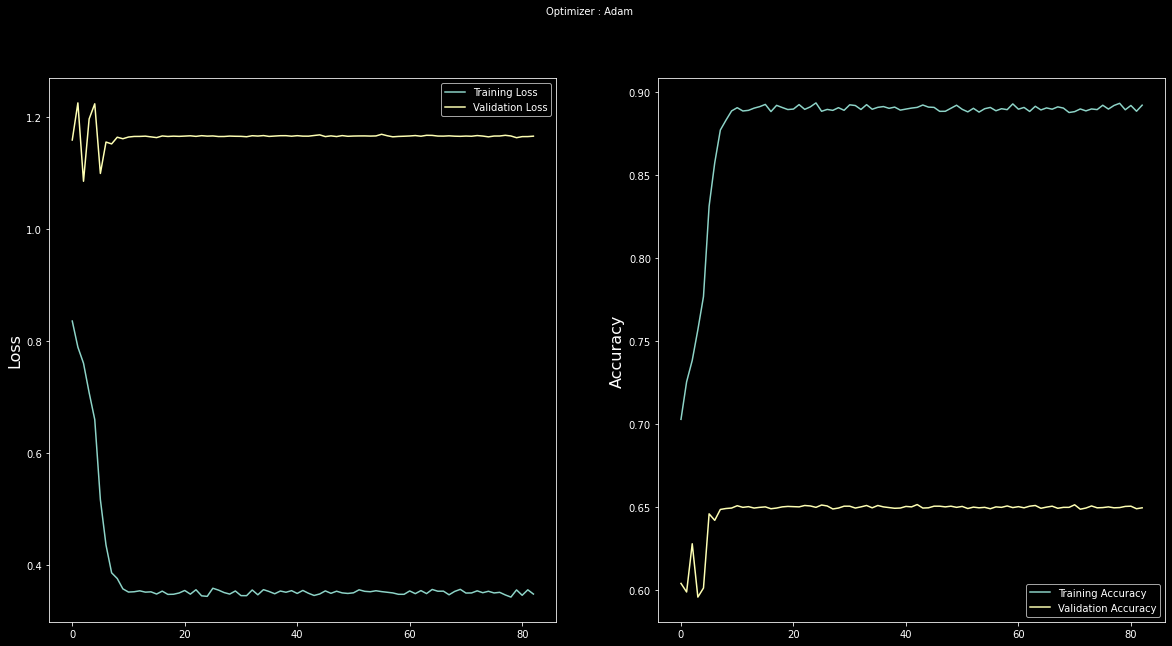

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#https://www.kaggle.com/code/abduulrahmankhalid/emotion-based-music-recommender-resnet50v2